In [6]:
import pandas as pd
import numpy as np
from sklearn import feature_extraction, linear_model, model_selection


In [7]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
all_data = pd.read_csv('socialmedia-disaster-tweets-DFE.csv')

In [8]:
test_df.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [9]:
test_df.shape

(3263, 4)

In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 13 columns):
_unit_id                 10876 non-null int64
_golden                  10876 non-null bool
_unit_state              10876 non-null object
_trusted_judgments       10876 non-null int64
_last_judgment_at        10792 non-null object
choose_one               10876 non-null object
choose_one:confidence    10876 non-null float64
choose_one_gold          87 non-null object
keyword                  10789 non-null object
location                 7238 non-null object
text                     10876 non-null object
tweetid                  10876 non-null float64
userid                   10789 non-null float64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [11]:
all_data.head(1)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN


In [12]:
all_data = all_data[['choose_one','text']]
all_data['target'] = (all_data['choose_one'] == 'Relevant').astype(int)
all_data['id'] = all_data.index

In [13]:
all_data.head(3)


,choose_one,text,target,id
0,Relevant,Just happened a terrible car crash,1,0
1,Relevant,Our Deeds are the Reason of this #earthquake M...,1,1
2,Relevant,"Heard about #earthquake is different cities, s...",1,2


In [14]:
all_data.shape

(10876, 4)

In [15]:
merged_df = pd.merge(test_df,all_data, on = 'id' )

In [16]:
merged_df.head()

,id,keyword,location,text_x,choose_one,text_y,target
0,0,NaN,NaN,Just happened a terrible car crash,Relevant,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",Relevant,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",Relevant,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,Relevant,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,Relevant,Typhoon Soudelor kills 28 in China and Taiwan,1


In [17]:
merged_df.shape

(3263, 7)

In [18]:
subm_df = merged_df[['id', 'target']]

In [19]:
subm_df.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [20]:
original_test_df = merged_df[['id','keyword','location','text_x','target']]

In [21]:
original_test_df.head()

,id,keyword,location,text_x,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [22]:
y_true = original_test_df['target']

In [23]:
y_true.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [24]:
y_true.shape

(3263,)

In [26]:
# 1st MODEL

In [27]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train_df['text'])
test_vectors = count_vectorizer.transform(test_df['text'])
clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))
clf.fit(train_vectors, train_df['target'])

0.6001146207285265


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [28]:
y_pred = clf.predict(test_vectors)

In [29]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [30]:
y_pred.shape

(3263,)

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_true,y_pred)

0.7260221627818112

In [ ]:
# 0.77 vs 0.72

In [ ]:
# 2d MODEL

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression(C = 1)

scores = model_selection.cross_val_score(clf, train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))
clf.fit(train_vectors, train_df['target'])
THRESHOLD = 0.41
preds = np.where(clf.predict_proba(test_vectors)[:,1] > THRESHOLD, 1, 0)

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6452466916593999


/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
y_pred_2 = np.where(clf.predict_proba(test_vectors)[:,1] > THRESHOLD, 1, 0)

In [36]:
f1_score(y_true,y_pred_2)

0.7560087399854333

In [ ]:
# 0.788 vs 0.756

In [37]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = np.where(clf.predict_proba(test_vectors)[:,1] > THRESHOLD, 1, 0)
sample_submission.to_csv('answer.csv', index= False)

In [72]:
# 3d MODEL

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)

In [40]:
tf_idf_train_vectors = tf_idf_vectorizer.fit_transform(train_df['text'])
tf_idf_test_vectors = tf_idf_vectorizer.transform(test_df['text'])

clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, tf_idf_train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))


0.611926795197027


In [41]:
tf_idf_train_vectors.shape

(7613, 21363)

In [42]:
tf_idf_train_vectors.toarray().shape

(7613, 21363)

In [43]:
clf.fit(tf_idf_train_vectors, train_df['target'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [44]:
y_pred_3 = clf.predict(tf_idf_test_vectors)

In [45]:
f1_score(y_true,y_pred_3)

0.756060606060606

In [46]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = y_pred_3
sample_submission.to_csv('answer.csv', index= False)

In [ ]:
# 0.803 vs 0.756

In [ ]:
# 4th MODEL

In [47]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tf_idf_train_vectors = tf_idf_vectorizer.fit_transform(train_df['text'])
tf_idf_test_vectors = tf_idf_vectorizer.transform(test_df['text'])

In [103]:
clf = LogisticRegression(C=1)
clf.fit(tf_idf_train_vectors, train_df['target'])
THRESHOLD = 0.41
y_pred_4 = np.where(clf.predict_proba(tf_idf_test_vectors)[:,1] > THRESHOLD, 1, 0)

In [104]:
f1_score(y_true,y_pred_4)

0.7510344827586205

In [105]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = y_pred_4
sample_submission.to_csv('answer.csv', index= False)

In [ ]:
# 0.77709 vs 0.751034

In [ ]:
# 5th model - RidgeClassifier with different C parameters

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [49]:
param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10]}

In [50]:
grid = GridSearchCV(RidgeClassifier(),param_grid, cv=5)
grid.fit(tf_idf_train_vectors,train_df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [51]:
grid.best_params_

{'alpha': 10}

In [54]:
clf = RidgeClassifier(alpha=10)

In [55]:
clf.fit(tf_idf_train_vectors,train_df['target'])
y_pred_5 = clf.predict(tf_idf_test_vectors)
f1_score(y_true,y_pred_5)

0.7183212267958031

In [56]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = y_pred_5
sample_submission.to_csv('answer.csv', index= False)

In [ ]:
# 0.79038 vs 0.718

In [ ]:
# Model 6 (tf-idf with max_df = 0.8)

In [74]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tf_idf_train_vectors = tf_idf_vectorizer.fit_transform(train_df['text'])
tf_idf_test_vectors = tf_idf_vectorizer.transform(test_df['text'])

clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, tf_idf_train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

0.611926795197027


In [83]:
tf_idf_vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.8,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [82]:
clf.get_params()

{'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [75]:
clf.fit(tf_idf_train_vectors, train_df['target'])
y_pred_6 = clf.predict(tf_idf_test_vectors)
f1_score(y_true,y_pred_6)

0.756060606060606

In [ ]:
# MODEL 7 (bigrams)

In [76]:
from sklearn.pipeline import make_pipeline

In [90]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.5), RidgeClassifier())
param_grid = {"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
              'ridgeclassifier__alpha':[0.001, 0.01, 0.1, 1, 10]}

In [91]:
grid = GridSearchCV(pipe, param_grid, cv=5)


In [92]:
grid.fit(train_df['text'], train_df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.5,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                               

In [93]:
grid.best_score_

0.7300710179352426

In [94]:
grid.best_params_

{'ridgeclassifier__alpha': 10, 'tfidfvectorizer__ngram_range': (1, 1)}

In [96]:
import mglearn

/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/karinahanova/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


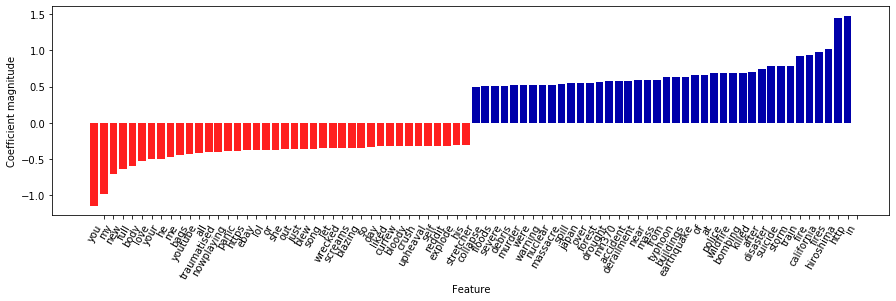

In [97]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['ridgeclassifier'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

In [104]:
tf_idf_vectorizer = TfidfVectorizer(max_df=0.5, ngram_range = (2,2))
tf_idf_train_vectors = tf_idf_vectorizer.fit_transform(train_df['text'])
tf_idf_test_vectors = tf_idf_vectorizer.transform(test_df['text'])

clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, tf_idf_train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

0.3876111219361926


In [115]:
cv = feature_extraction.text.CountVectorizer(max_df=0.5, ngram_range = (2,2)).fit(train_df['text'])

In [118]:
tf_idf_train_vectors = cv.transform(train_df['text'])
tf_idf_test_vectors = cv.transform(test_df['text'])

In [119]:
clf = linear_model.RidgeClassifier()
clf.fit(tf_idf_train_vectors, train_df['target'])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

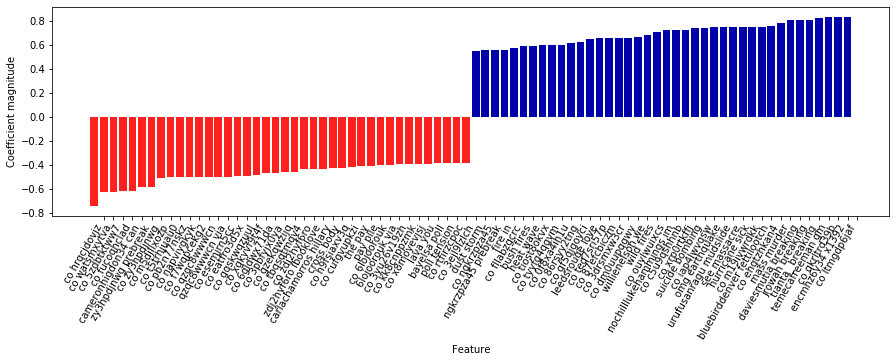

In [120]:
coef = clf.coef_
feature_names = np.array(cv.get_feature_names())
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

In [121]:
# Model 8 (cleaning data)

In [25]:
#  Remove URL
import re
def remove_URL(text):
    
    url = re.compile(r'https?://\S+|www\.\S+')
    
    return url.sub(r'',text)

train_df['text'] = train_df['text'].apply(lambda x:  remove_URL(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_URL(x))

In [26]:
# Remove HTML tags
def remove_HTML(text):
    url = re.compile(r'<.*?>')
    return url.sub(r'',text)

train_df['text'] = train_df['text'].apply(lambda x:  remove_HTML(x))
test_df['text'] = test_df['text'].apply(lambda x:  remove_HTML(x))

In [124]:
tf_idf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tf_idf_train_vectors = tf_idf_vectorizer.fit_transform(train_df['text'])
tf_idf_test_vectors = tf_idf_vectorizer.transform(test_df['text'])

clf = linear_model.RidgeClassifier()
scores = model_selection.cross_val_score(clf, tf_idf_train_vectors, train_df['target'], cv = 3, scoring= 'f1')
print(np.mean(scores))

clf.fit(tf_idf_train_vectors, train_df['target'])
y_pred_8 = clf.predict(tf_idf_test_vectors)
f1_score(y_true,y_pred_8)

0.5905282992244131


0.7428350116189

In [125]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['target'] = y_pred_8
sample_submission.to_csv('answer.csv', index= False)

In [131]:
for i in train_df['text'][:3]:
    print(i)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected


In [130]:
for i in train_df['text'][:3]:
    print(i.strip())

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected


In [128]:
# LSA 

In [2]:
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [41]:

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

In [4]:
def load_data(doc):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    for line in doc:
        text = line.strip()
        documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),2)] )
    
    return documents_list,titles

In [27]:
document_list,titles = load_data(train_df['text'])

Total Number of Documents: 7613


In [28]:
document_list[:1]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all']

In [29]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [30]:
clean_text=preprocess_data(document_list)

In [33]:
clean_text[:2]

[['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us'],
 ['forest', 'fire', 'near', 'la', 'rong', 'sask', 'canada']]

In [34]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned 
    # an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [35]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [39]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [37]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

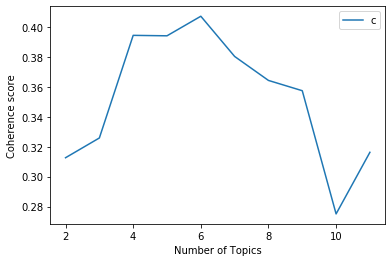

In [42]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [44]:
number_of_topics=6
words=10
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '-0.366*"like" + -0.363*"amp" + -0.316*"fire" + -0.220*"û_" + -0.160*"get" + -0.154*"2" + -0.126*"bomb" + -0.117*"new" + -0.116*"video" + -0.110*"one"'), (1, '0.646*"fire" + -0.562*"like" + 0.235*"û_" + 0.125*"california" + -0.122*"get" + -0.122*"look" + 0.098*"forest" + -0.096*"amp" + -0.081*"video" + 0.076*"build"'), (2, '-0.418*"bomb" + 0.335*"fire" + -0.274*"suicid" + 0.273*"like" + 0.228*"amp" + -0.221*"û_" + -0.204*"old" + -0.194*"year" + -0.181*"bomber" + -0.159*"kill"'), (3, '-0.705*"amp" + 0.464*"like" + 0.291*"fire" + -0.206*"2" + -0.107*"disast" + -0.076*"obama" + -0.069*"declar" + 0.068*"look" + 0.066*"video" + 0.065*"burn"'), (4, '-0.516*"disast" + -0.388*"obama" + -0.366*"declar" + 0.249*"û_" + -0.226*"devast" + -0.219*"typhoon" + -0.192*"northern" + -0.192*"saipan" + -0.179*"sign" + -0.151*"fire"'), (5, '-0.434*"û_" + 0.267*"bomb" + 0.264*"fire" + 0.244*"amp" + -0.225*"bodi" + -0.216*"disast" + -0.205*"bag" + -0.190*"new" + 0.180*"suicid" + -0.155*"obama"')]


In [50]:
for i in model.print_topics(num_topics=number_of_topics, num_words=words):
    print('topic 1:', i,'\n')

topic 1: (0, '-0.366*"like" + -0.363*"amp" + -0.316*"fire" + -0.220*"û_" + -0.160*"get" + -0.154*"2" + -0.126*"bomb" + -0.117*"new" + -0.116*"video" + -0.110*"one"') 

topic 1: (1, '0.646*"fire" + -0.562*"like" + 0.235*"û_" + 0.125*"california" + -0.122*"get" + -0.122*"look" + 0.098*"forest" + -0.096*"amp" + -0.081*"video" + 0.076*"build"') 

topic 1: (2, '-0.418*"bomb" + 0.335*"fire" + -0.274*"suicid" + 0.273*"like" + 0.228*"amp" + -0.221*"û_" + -0.204*"old" + -0.194*"year" + -0.181*"bomber" + -0.159*"kill"') 

topic 1: (3, '-0.705*"amp" + 0.464*"like" + 0.291*"fire" + -0.206*"2" + -0.107*"disast" + -0.076*"obama" + -0.069*"declar" + 0.068*"look" + 0.066*"video" + 0.065*"burn"') 

topic 1: (4, '-0.516*"disast" + -0.388*"obama" + -0.366*"declar" + 0.249*"û_" + -0.226*"devast" + -0.219*"typhoon" + -0.192*"northern" + -0.192*"saipan" + -0.179*"sign" + -0.151*"fire"') 

topic 1: (5, '-0.434*"û_" + 0.267*"bomb" + 0.264*"fire" + 0.244*"amp" + -0.225*"bodi" + -0.216*"disast" + -0.205*"bag" +